<a href="https://colab.research.google.com/github/Yyyyyjkim/Molecule_analysis/blob/main/01_read_molecules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.7 MB 5.3 MB/s 


# RDKIT - read molecules

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.PropertyMol import PropertyMol

In [ ]:
mol = Chem.MolFromSmiles('CCC')

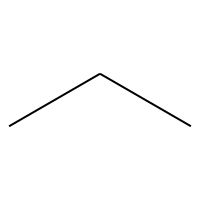

In [ ]:
Draw.MolsToImage([mol])

In [ ]:
Chem.MolToMolBlock(mol).split('\n')

['',
 '     RDKit          2D',
 '',
 '  3  2  0  0  0  0  0  0  0  0999 V2000',
 '    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0',
 '    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0',
 '    2.5981   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0',
 '  1  2  1  0',
 '  2  3  1  0',
 'M  END',
 '']

In [ ]:
Chem.MolToJSON(mol)

'{"commonchem":{"version":10},"defaults":{"atom":{"z":6,"impHs":0,"chg":0,"nRad":0,"isotope":0,"stereo":"unspecified"},"bond":{"bo":1,"stereo":"unspecified"}},"molecules":[{"atoms":[{"impHs":3},{"impHs":2},{"impHs":3}],"bonds":[{"atoms":[0,1]},{"atoms":[1,2]}],"extensions":[{"name":"rdkitRepresentation","formatVersion":2,"toolkitVersion":"2022.03.4","cipRanks":[0,1,0]}]}]}'

# atom & bond info

In [ ]:
import re
import pandas as pd

In [ ]:
# atom info list
atom_info = [prop for prop in mol.GetAtoms()[0].__dir__() if re.match('^Get', prop)]

# atom
atom_result = pd.DataFrame(index=range(mol.GetNumAtoms()), columns = atom_info)

for i, atom in enumerate(mol.GetAtoms()):
    list_temp = []
    for _, prop in enumerate(atom_info):
        try:
            func = getattr(atom, prop)
            prop_value = func()
            list_temp.append(prop_value)

        except:
            list_temp.append(None)

    atom_result.iloc[i,:] = list_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/blocks.py:937: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


In [ ]:
atom_result

,GetAtomicNum,GetSymbol,GetIdx,GetDegree,GetTotalDegree,GetTotalNumHs,GetNumImplicitHs,GetExplicitValence,GetImplicitValence,GetTotalValence,...,GetIntProp,GetUnsignedProp,GetDoubleProp,GetBoolProp,GetExplicitBitVectProp,GetPropNames,GetPropsAsDict,GetMonomerInfo,GetPDBResidueInfo,GetAtomMapNum
0,6,C,0,1,4,3,3,1,3,4,...,None,None,None,None,None,[],"{'__computedProps': ['_CIPRank'], '_CIPRank': 0}",None,None,0
1,6,C,1,2,4,2,2,2,2,4,...,None,None,None,None,None,[],"{'__computedProps': ['_CIPRank'], '_CIPRank': 1}",None,None,0
2,6,C,2,1,4,3,3,1,3,4,...,None,None,None,None,None,[],"{'__computedProps': ['_CIPRank'], '_CIPRank': 0}",None,None,0


In [ ]:
# bond info list
bond_info = [prop for prop in mol.GetBonds()[0].__dir__() if re.match('^Get', prop)]

# bond
bond_result = pd.DataFrame(index=range(mol.GetNumBonds()), columns = bond_info)

for i, bond in enumerate(mol.GetBonds()):
    list_temp = []
    for _, prop in enumerate(bond_info):
        try:
            func = getattr(bond, prop)
            prop_value = func()
            list_temp.append(prop_value)

        except:
            list_temp.append(None)

    bond_result.iloc[i,:] = list_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/blocks.py:937: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


In [ ]:
bond_result

,GetOwningMol,GetBondType,GetBondTypeAsDouble,GetBondDir,GetStereo,GetStereoAtoms,GetValenceContrib,GetIsAromatic,GetIsConjugated,GetIdx,...,GetEndAtom,GetOtherAtom,GetSmarts,GetProp,GetIntProp,GetUnsignedProp,GetDoubleProp,GetBoolProp,GetPropNames,GetPropsAsDict
0,<rdkit.Chem.rdchem.Mol object at 0x7fe0a1fc0030>,SINGLE,1.0,NONE,STEREONONE,[],None,False,False,0,...,<rdkit.Chem.rdchem.Atom object at 0x7fe0a1fc0850>,None,,None,None,None,None,None,[],{}
1,<rdkit.Chem.rdchem.Mol object at 0x7fe0a1fc0120>,SINGLE,1.0,NONE,STEREONONE,[],None,False,False,1,...,<rdkit.Chem.rdchem.Atom object at 0x7fe0a1fcbb70>,None,,None,None,None,None,None,[],{}


# 3D optimization

In [ ]:
!pip install openbabel_wheel 
# !pip install openbabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.8 MB 85.9 MB/s 


In [ ]:
from openbabel import pybel as pb

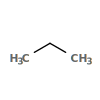

In [ ]:
molecule = pb.readstring('smiles', 'CCC')
molecule

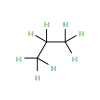

In [ ]:
molecule.localopt(forcefield='mmff94', steps=500) # forcefield = ['mmff94', 'uff', 'ghemical']
molecule

# write molecules

In [ ]:
# SDF 저장
writer = Chem.SDWriter('mol_temp.sdf')
writer.write(mol)